<a href="https://colab.research.google.com/github/Mart1n2015/CODERHOUSE-DSIII/blob/main/TRABAJO%20MARTIN%20CERIOLI%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS DE SENTIMIENTO DE TWITTER Y SU REPERCUCUON EN EL MERCADO ACCIONARIO**

*Introduccion*

El presente trabajo tiene como objetivo analizar si existe una relación entre los comentarios sobre compañías publicados en la red social Twitter y su impacto en el precio de sus acciones. Para ello, se utilizará un dataset obtenido de la plataforma Kaggle (https://www.kaggle.com/), el cual será sometido a un proceso de exploración y análisis inicial.

Posteriormente, se realizará un análisis de los tweets mediante técnicas de Procesamiento del Lenguaje Natural (NLP), con el fin de extraer y cuantificar el sentimiento asociado a las menciones de las empresas. Finalmente, se aplicarán modelos de redes neuronales para evaluar la capacidad predictiva del sentimiento expresado en redes sociales sobre la variación en el precio del activo financiero.

*Hipotesis*

Los comentarios tanto negativo como positivos de las compañias en las redes sociales tienen impacto en el precio de las mismas.


Comenzamos importando las librerias con las quew vamos a trabajar.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url_dataset = "https://raw.githubusercontent.com/Mart1n2015/CODERHOUSE-DSIII/refs/heads/main/reduced_dataset-release.csv"

In [ ]:
dataframe = pd.read_csv(url_dataset,sep=",")

/tmp/ipython-input-3141434697.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(url_dataset,sep=",")


#*EDA*

Una vez importadas las librerias y los datos comenzamos a explorar los datos.

In [ ]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143282 entries, 0 to 143281
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         124761 non-null  object 
 1   TWEET              143279 non-null  object 
 2   STOCK              85176 non-null   object 
 3   DATE               85176 non-null   object 
 4   LAST_PRICE         85176 non-null   float64
 5   1_DAY_RETURN       85176 non-null   float64
 6   2_DAY_RETURN       85176 non-null   float64
 7   3_DAY_RETURN       85176 non-null   float64
 8   7_DAY_RETURN       85176 non-null   float64
 9   PX_VOLUME          85176 non-null   float64
 10  VOLATILITY_10D     85171 non-null   float64
 11  VOLATILITY_30D     85165 non-null   float64
 12  LSTM_POLARITY      85175 non-null   object 
 13  TEXTBLOB_POLARITY  45594 non-null   object 
 14  MENTION            27073 non-null   object 
dtypes: float64(8), object(7)
memory usage: 16.4+ MB


Quitamos datos nulos.

In [12]:
processed_dataframe = dataframe.copy()
processed_dataframe = processed_dataframe.dropna(subset=['Unnamed: 0', 'STOCK'])

print(f"Shape of processed_dataframe after dropping nulls in 'Unnamed: 0' and 'STOCK': {processed_dataframe.shape}")
display(processed_dataframe.head(50))

Shape of processed_dataframe after dropping nulls in 'Unnamed: 0' and 'STOCK': (66655, 15)


,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
11,7,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,31/01/2017,55.2200,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1,0.2,@Starbucks
20,12,@gawker Jamaicans make money with @Payoneer @P...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
23,14,RT @cultcommoncore: Dumping @Starbucks\r\r\r\r...,Starbucks,31/01/2017,55.2200,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,-1,0.0,@Starbucks
26,16,@amazon has your back when it comes to food sh...,Amazon,31/01/2017,823.4800,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1,0.0,@amazon
35,21,"RT @nia4_trump: So instead of hiring 10,000 un...",Starbucks,31/01/2017,55.2200,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,-1,0.0,@Starbucks
48,28,Hmmm interesting... \r\r\r\r\r\r\nonly @IBM ha...,Disney,31/01/2017,110.6500,0.002621,-0.012201,-0.012201,-0.024853,8485838.0,12.229,12.982,-1,0.25,@Disney
53,31,RT @IndiaHistorypic: 1994::Young @sundarpichai...,Google,31/01/2017,820.1900,0.004438,0.030286,0.030286,0.035772,2020180.0,21.549,14.953,-1,0.0,@Google


In [13]:
dataframe = processed_dataframe

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66655 entries, 2 to 143279
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         66655 non-null  object 
 1   TWEET              66655 non-null  object 
 2   STOCK              66655 non-null  object 
 3   DATE               66655 non-null  object 
 4   LAST_PRICE         66655 non-null  float64
 5   1_DAY_RETURN       66655 non-null  float64
 6   2_DAY_RETURN       66655 non-null  float64
 7   3_DAY_RETURN       66655 non-null  float64
 8   7_DAY_RETURN       66655 non-null  float64
 9   PX_VOLUME          66655 non-null  float64
 10  VOLATILITY_10D     66655 non-null  float64
 11  VOLATILITY_30D     66644 non-null  float64
 12  LSTM_POLARITY      66655 non-null  object 
 13  TEXTBLOB_POLARITY  27073 non-null  object 
 14  MENTION            27073 non-null  object 
dtypes: float64(8), object(7)
memory usage: 8.1+ MB


Creamos gráficos para una mejor visualizacion de la información.

/tmp/ipython-input-2489273345.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MENTION_COUNT', y='STOCK', data=top_15_stocks, palette='viridis')


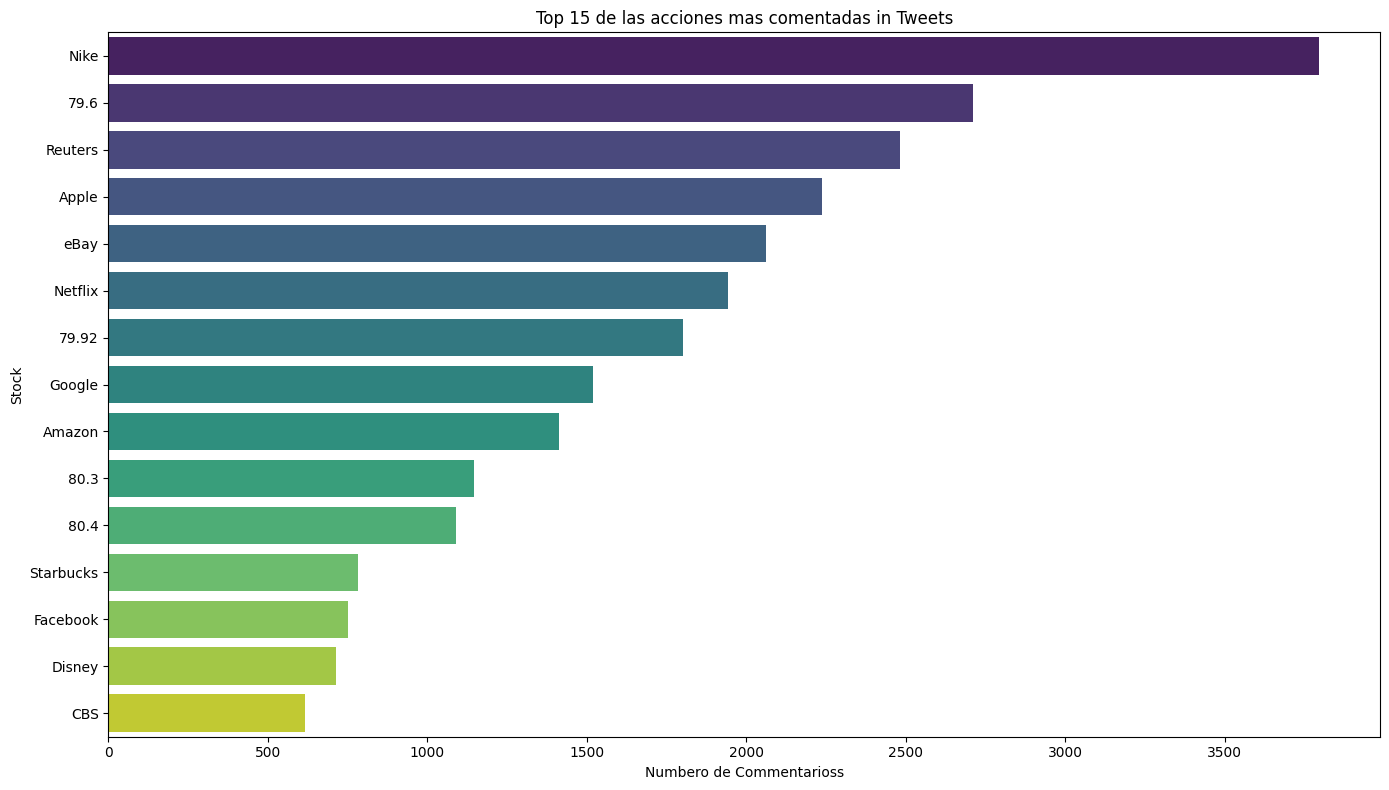

,STOCK,MENTION_COUNT
0,Nike,3797
1,79.6,2710
2,Reuters,2482
3,Apple,2238
4,eBay,2063
5,Netflix,1942
6,79.92,1801
7,Google,1518
8,Amazon,1412
9,80.3,1147


In [15]:


# Creamos un grafico para verificar las 15 acciones mas mencionadas
stock_counts = processed_dataframe['STOCK'].value_counts().reset_index()
stock_counts.columns = ['STOCK', 'MENTION_COUNT']

top_15_stocks = stock_counts.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='MENTION_COUNT', y='STOCK', data=top_15_stocks, palette='viridis')
plt.title('Top 15 de las acciones mas comentadas in Tweets')
plt.xlabel('Numbero de Commentarioss')
plt.ylabel('Stock')
plt.tight_layout()
plt.show()

display(top_15_stocks)

/tmp/ipython-input-475730145.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='1_DAY_RETURN', y='STOCK', data=average_returns.head(20), palette='coolwarm') # Display top 20 for clarity


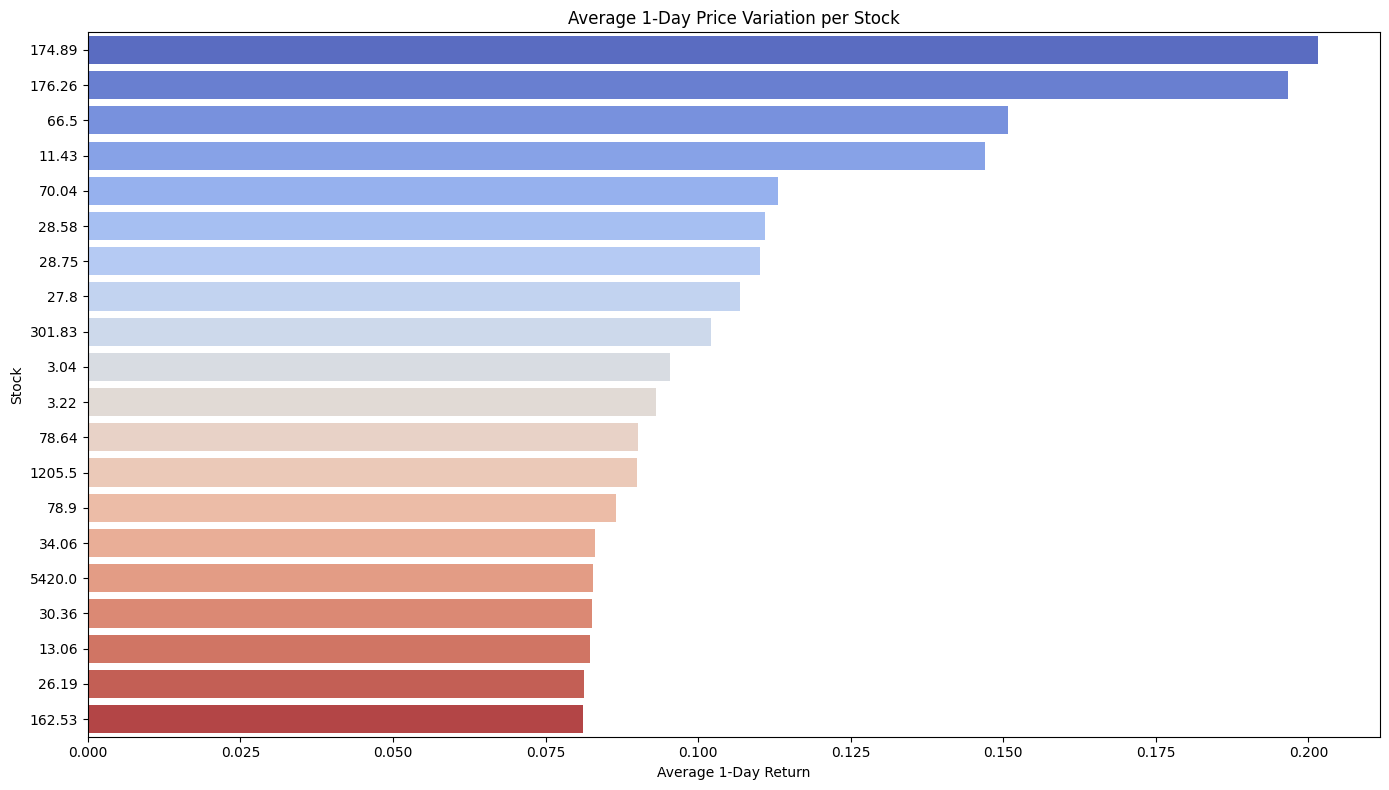

,STOCK,1_DAY_RETURN
709,174.89,0.201641
715,176.26,0.196585
2071,66.5,0.150827
146,11.43,0.146982
2138,70.04,0.113078
1234,28.58,0.110917
1235,28.75,0.110083
1222,27.8,0.106924
1290,301.83,0.102177
1254,3.04,0.095395


In [16]:
## Calculamos el promedio de un día de la accion
average_returns = processed_dataframe.groupby('STOCK')['1_DAY_RETURN'].mean().reset_index()

average_returns = average_returns.sort_values(by='1_DAY_RETURN', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='1_DAY_RETURN', y='STOCK', data=average_returns.head(20), palette='coolwarm') # Display top 20 for clarity
plt.title('Average 1-Day Price Variation per Stock')
plt.xlabel('Average 1-Day Return')
plt.ylabel('Stock')
plt.tight_layout()
plt.show()

display(average_returns.head(20))

#*NLTK*

A partir de ahora tomaremos la columna de TWEET para aplicar Procesamiento de Lenguaje Natural con el objetivo de verificar el contenido de los mismos y poderlo modelar.


Importamos  las librerias necesarias para aplicar  NLTK


In [26]:
import nltk

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


Aplicamos cuatro tecnicas para procesar textos.

*   Quitar símbolos y signos de puntuación
*   Tokenización
*   Eliminación de stopwords.
*   Lematización


In [20]:
import re

def remove_punctuation(text):
    if pd.isna(text):
        return ""
    text = str(text).lower() # Ensure text is string and convert to lowercase
    # Remove non-alphanumeric characters (keep letters and numbers, replace others with a space)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip() # Remove leading/trailing spaces

dataframe['TWEET_NO_PUNCT'] = dataframe['TWEET'].apply(remove_punctuation)
display(dataframe[['TWEET', 'TWEET_NO_PUNCT']].head())

,TWEET,TWEET_NO_PUNCT
2,@FAME95FM1 Jamaicans make money with @Payoneer...,fame95fm1 jamaicans make money with payoneer p...
3,@CBSi Jamaicans make money with @Payoneer @Pay...,cbsi jamaicans make money with payoneer paypal...
4,@Hitz92fm Jamaicans make money with @Payoneer ...,hitz92fm jamaicans make money with payoneer pa...
11,"RT @nikitakhara: Thank you, @Starbucks CEO for...",rt nikitakhara thank you starbucks ceo for com...
20,@gawker Jamaicans make money with @Payoneer @P...,gawker jamaicans make money with payoneer payp...


In [27]:
import nltk

def tokenize_text(text):
    if pd.isna(text):
        return []
    return nltk.word_tokenize(text)

dataframe['TWEET_TOKENIZED'] = dataframe['TWEET_NO_PUNCT'].apply(tokenize_text)
display(dataframe[['TWEET_NO_PUNCT', 'TWEET_TOKENIZED']].head())

,TWEET_NO_PUNCT,TWEET_TOKENIZED
2,fame95fm1 jamaicans make money with payoneer p...,"[fame95fm1, jamaicans, make, money, with, payo..."
3,cbsi jamaicans make money with payoneer paypal...,"[cbsi, jamaicans, make, money, with, payoneer,..."
4,hitz92fm jamaicans make money with payoneer pa...,"[hitz92fm, jamaicans, make, money, with, payon..."
11,rt nikitakhara thank you starbucks ceo for com...,"[rt, nikitakhara, thank, you, starbucks, ceo, ..."
20,gawker jamaicans make money with payoneer payp...,"[gawker, jamaicans, make, money, with, payonee..."


In [28]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    if not isinstance(tokens, list):
        return []
    return [word for word in tokens if word not in stop_words]

dataframe['TWEET_NO_STOPWORDS'] = dataframe['TWEET_TOKENIZED'].apply(remove_stopwords)
display(dataframe[['TWEET_TOKENIZED', 'TWEET_NO_STOPWORDS']].head())

,TWEET_TOKENIZED,TWEET_NO_STOPWORDS
2,"[fame95fm1, jamaicans, make, money, with, payo...","[fame95fm1, jamaicans, make, money, payoneer, ..."
3,"[cbsi, jamaicans, make, money, with, payoneer,...","[cbsi, jamaicans, make, money, payoneer, paypa..."
4,"[hitz92fm, jamaicans, make, money, with, payon...","[hitz92fm, jamaicans, make, money, payoneer, p..."
11,"[rt, nikitakhara, thank, you, starbucks, ceo, ...","[rt, nikitakhara, thank, starbucks, ceo, commi..."
20,"[gawker, jamaicans, make, money, with, payonee...","[gawker, jamaicans, make, money, payoneer, pay..."


In [30]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    if not isinstance(tokens, list):
        return []
    return [lemmatizer.lemmatize(word) for word in tokens]

dataframe['TWEET_LEMMATIZED'] = dataframe['TWEET_NO_STOPWORDS'].apply(lemmatize_words)
display(dataframe[['TWEET_NO_STOPWORDS', 'TWEET_LEMMATIZED']].head())

,TWEET_NO_STOPWORDS,TWEET_LEMMATIZED
2,"[fame95fm1, jamaicans, make, money, payoneer, ...","[fame95fm1, jamaican, make, money, payoneer, p..."
3,"[cbsi, jamaicans, make, money, payoneer, paypa...","[cbsi, jamaican, make, money, payoneer, paypal..."
4,"[hitz92fm, jamaicans, make, money, payoneer, p...","[hitz92fm, jamaican, make, money, payoneer, pa..."
11,"[rt, nikitakhara, thank, starbucks, ceo, commi...","[rt, nikitakhara, thank, starbucks, ceo, commi..."
20,"[gawker, jamaicans, make, money, payoneer, pay...","[gawker, jamaican, make, money, payoneer, payp..."


# Task
Perform sentiment analysis on the `TWEET_LEMMATIZED` column of the `dataframe` using NLTK's VADER sentiment analyzer, adding new columns for compound, positive, negative, and neutral sentiment scores.

## Importar el analizador de sentimiento VADER

### Subtask:
Import the `SentimentIntensityAnalyzer` from `nltk.sentiment.vader` and ensure the VADER lexicon is downloaded.


**Reasoning**:
The subtask requires importing `SentimentIntensityAnalyzer` and ensuring the VADER lexicon is downloaded. I will add a code block to handle both, using a try-except block for downloading the lexicon to prevent errors if it's already present and to ensure a quiet download.



In [31]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon', quiet=True)

print("SentimentIntensityAnalyzer imported and VADER lexicon checked/downloaded.")

SentimentIntensityAnalyzer imported and VADER lexicon checked/downloaded.


## Inicializar VADER y analizar sentimiento

### Subtask:
Inicializar el `SentimentIntensityAnalyzer` y definir una función para aplicar el análisis de sentimiento VADER a la columna `TWEET_LEMMATIZED`.


**Reasoning**:
The subtask requires initializing the `SentimentIntensityAnalyzer` and defining a function to apply VADER sentiment analysis to the `TWEET_LEMMATIZED` column, which involves joining the lemmatized tokens into a string and obtaining the sentiment scores.



In [32]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_scores(tokens):
    if not tokens:
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

    # Join the lemmatized tokens into a single string
    text = " ".join(tokens)

    # Get VADER sentiment scores
    return analyzer.polarity_scores(text)

print("VADER SentimentIntensityAnalyzer initialized and sentiment scoring function defined.")

VADER SentimentIntensityAnalyzer initialized and sentiment scoring function defined.


**Reasoning**:
Now that the VADER analyzer is initialized and the sentiment scoring function is defined, the next step is to apply this function to the 'TWEET_LEMMATIZED' column of the dataframe and extract the compound, positive, negative, and neutral sentiment scores into new, separate columns.



In [33]:
sentiment_scores = dataframe['TWEET_LEMMATIZED'].apply(vader_sentiment_scores)

dataframe['VADER_COMPOUND'] = sentiment_scores.apply(lambda x: x['compound'])
dataframe['VADER_NEG'] = sentiment_scores.apply(lambda x: x['neg'])
dataframe['VADER_NEU'] = sentiment_scores.apply(lambda x: x['neu'])
dataframe['VADER_POS'] = sentiment_scores.apply(lambda x: x['pos'])

print("VADER sentiment scores (compound, negative, neutral, positive) added to the dataframe.")
display(dataframe[['TWEET_LEMMATIZED', 'VADER_COMPOUND', 'VADER_NEG', 'VADER_NEU', 'VADER_POS']].head())

VADER sentiment scores (compound, negative, neutral, positive) added to the dataframe.


,TWEET_LEMMATIZED,VADER_COMPOUND,VADER_NEG,VADER_NEU,VADER_POS
2,"[fame95fm1, jamaican, make, money, payoneer, p...",0.0000,0.0,1.000,0.000
3,"[cbsi, jamaican, make, money, payoneer, paypal...",0.0000,0.0,1.000,0.000
4,"[hitz92fm, jamaican, make, money, payoneer, pa...",0.0000,0.0,1.000,0.000
11,"[rt, nikitakhara, thank, starbucks, ceo, commi...",0.6908,0.0,0.573,0.427
20,"[gawker, jamaican, make, money, payoneer, payp...",0.0000,0.0,1.000,0.000


## Finalizar tarea

### Subtask:
Confirmar que el análisis de sentimiento ha sido aplicado exitosamente y el DataFrame está listo para el siguiente paso.


## Summary:

### Data Analysis Key Findings

*   The NLTK VADER lexicon was successfully downloaded and imported, and the `SentimentIntensityAnalyzer` was initialized.
*   A custom function, `vader_sentiment_scores`, was defined to apply VADER sentiment analysis to lists of lemmatized tokens, correctly handling empty token lists by returning zero scores.
*   Sentiment analysis was performed on the `TWEET_LEMMATIZED` column of the dataframe.
*   Four new columns were added to the dataframe: `VADER_COMPOUND`, `VADER_NEG`, `VADER_NEU`, and `VADER_POS`, representing the compound, negative, neutral, and positive sentiment scores, respectively.
*   The sentiment scores were successfully populated; for example, neutral content received a `VADER_NEU` score of 1.0, while a tweet containing "thank" and "commit" resulted in a positive compound score of 0.6908 and a positive component of 0.427.

### Insights or Next Steps

*   The dataframe is now enriched with sentiment scores, making it ready for further analysis to understand the emotional tone of the tweets.
*   Next steps could involve calculating descriptive statistics for each sentiment score, visualizing the distribution of sentiments, or exploring correlations between sentiment and other tweet attributes.
